In [1]:
from __future__ import division

import tweepy # Helps in getting tweets 
from textblob import TextBlob # For getting tweet's subjectivity and polarity
from twython import Twython # Helps in getting tweets 
from wordcloud import WordCloud # Helps in forming a word cloud
import pandas as pd # Making and Manipulating a dataframe
import numpy as np # Helps in various vector and matrix calculations
import re # The Regex library
import matplotlib.pyplot as plt # For plotting various visualizations
from functools import reduce # An important method which will help in joining data frames
plt.style.use('fivethirtyeight')
import os # The os library to get current path and various other things
from PIL import Image # To get a mask for the word cloud

# Including various libraries for performing Machine Learning
from sklearn.model_selection import train_test_split
from stop_words import get_stop_words
from collections import Counter
import string

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [2]:
df1 = pd.read_csv('data1.csv')# Reading the first file
df1.drop(df1.columns[0],axis=1,inplace=True)

In [3]:
df2 = pd.read_csv('data2.csv')# Reading the second file
df2.drop(df2.columns[0],axis=1,inplace=True)

In [4]:
df3 = pd.read_csv('data3.csv')# Reading the third file
df3.drop(df3.columns[0],axis=1,inplace=True)

In [5]:
df4 = pd.read_csv('data4.csv')# Reading the fourth file
df4.drop(df4.columns[0],axis=1,inplace=True)

In [6]:
data_frames = [df1, df2, df3, df4] # Making a list of all dataframes
df1.head() # Checking the df

,tweet_id,tweets,tweet_text,Subjectivity,Polarity,Sentiment,location,retweets,response,date
0,1242694084235530241,{'created_at': 'Wed Mar 25 06:05:32 +0000 2020...,"Corona time - Good morning, suddenly I just wa...",0.550000,0.350000,Positive,Tel Aviv,0,NaN,2020-03-25
1,1242694694590541825,{'created_at': 'Wed Mar 25 06:07:57 +0000 2020...,Isolation gear and a SUV and no cops. Weird. I...,1.000000,-0.500000,Negative,"Portsmouth, RI",0,NaN,2020-03-25
2,1242694966297735169,{'created_at': 'Wed Mar 25 06:09:02 +0000 2020...,liveleak More Cooties than Corona?,0.500000,0.500000,Positive,"Warszawa, Polska",0,NaN,2020-03-25
3,1242695415037857793,{'created_at': 'Wed Mar 25 06:10:49 +0000 2020...,FIGHT DA VIRUS WITH DA GOAT TFITNES6 LAST PUSH...,0.066667,0.000000,Neutral,"Johannesburg, South Africa",0,NaN,2020-03-25
4,1242695498382934017,{'created_at': 'Wed Mar 25 06:11:09 +0000 2020...,Share it with your Loved Ones and Keep Social ...,0.288889,0.244444,Positive,"New York, NY",0,NaN,2020-03-25


In [7]:
df = reduce(lambda  left,right: pd.merge(left,right,on=['tweet_id','tweets','tweet_text','Subjectivity', 'Polarity', 'Sentiment','retweets','response','date','location'],
                                            how='outer'), data_frames)# Joining all the dataframes using reduce and merge

In [8]:
df.head()

,tweet_id,tweets,tweet_text,Subjectivity,Polarity,Sentiment,location,retweets,response,date
0,1242694084235530241,{'created_at': 'Wed Mar 25 06:05:32 +0000 2020...,"Corona time - Good morning, suddenly I just wa...",0.550000,0.350000,Positive,Tel Aviv,0,NaN,2020-03-25
1,1242694694590541825,{'created_at': 'Wed Mar 25 06:07:57 +0000 2020...,Isolation gear and a SUV and no cops. Weird. I...,1.000000,-0.500000,Negative,"Portsmouth, RI",0,NaN,2020-03-25
2,1242694966297735169,{'created_at': 'Wed Mar 25 06:09:02 +0000 2020...,liveleak More Cooties than Corona?,0.500000,0.500000,Positive,"Warszawa, Polska",0,NaN,2020-03-25
3,1242695415037857793,{'created_at': 'Wed Mar 25 06:10:49 +0000 2020...,FIGHT DA VIRUS WITH DA GOAT TFITNES6 LAST PUSH...,0.066667,0.000000,Neutral,"Johannesburg, South Africa",0,NaN,2020-03-25
4,1242695498382934017,{'created_at': 'Wed Mar 25 06:11:09 +0000 2020...,Share it with your Loved Ones and Keep Social ...,0.288889,0.244444,Positive,"New York, NY",0,NaN,2020-03-25


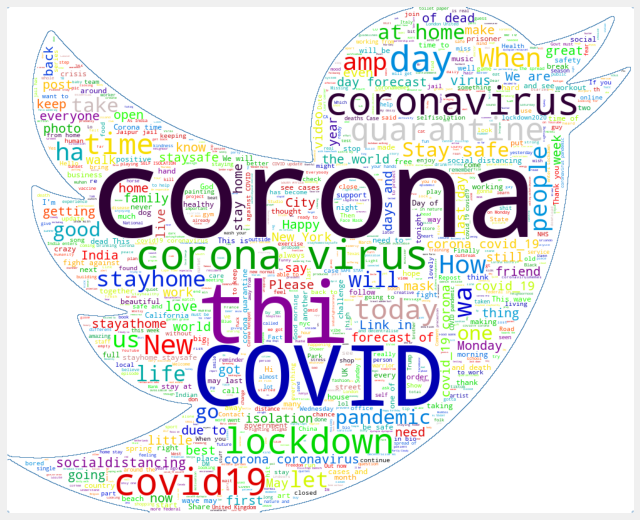

In [9]:
file = os.getcwd()

allWords = ' '.join([twts for twts in df['tweet_text']])

#We read the mask image into a numpy array
twitter_mask = np.array(Image.open(os.path.join(file, "twitter_mask.png")))
#We generate the wordcloud using the series created and the mask 
word_cloud = WordCloud(width=2000, height=1000, max_font_size=200, 
                       background_color="white", max_words=2000, mask=twitter_mask, 
                       contour_width=1, contour_color="steelblue", 
                       colormap="nipy_spectral").generate(allWords)

#Now we plot the figure
plt.figure(figsize=(10,10))
plt.imshow(word_cloud, interpolation="hermite")
plt.axis("off")    
plt.show()   


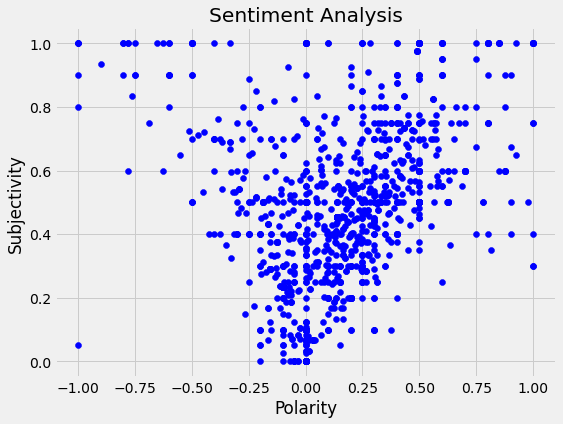

In [10]:
 # Plotting the polarity against subjectivity
plt.figure(figsize=(8,6)) 
for i in df.index:
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

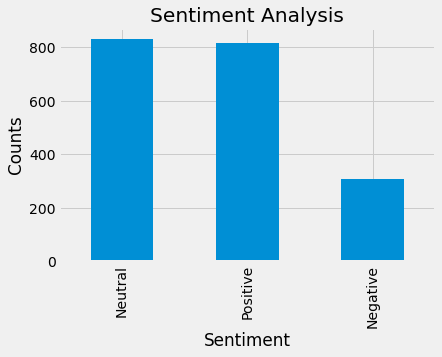

In [11]:
# Plotting the sentiment of the people
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Sentiment'].value_counts().plot(kind = 'bar')
plt.show()

In [12]:
df.head()

,tweet_id,tweets,tweet_text,Subjectivity,Polarity,Sentiment,location,retweets,response,date
0,1242694084235530241,{'created_at': 'Wed Mar 25 06:05:32 +0000 2020...,"Corona time - Good morning, suddenly I just wa...",0.550000,0.350000,Positive,Tel Aviv,0,NaN,2020-03-25
1,1242694694590541825,{'created_at': 'Wed Mar 25 06:07:57 +0000 2020...,Isolation gear and a SUV and no cops. Weird. I...,1.000000,-0.500000,Negative,"Portsmouth, RI",0,NaN,2020-03-25
2,1242694966297735169,{'created_at': 'Wed Mar 25 06:09:02 +0000 2020...,liveleak More Cooties than Corona?,0.500000,0.500000,Positive,"Warszawa, Polska",0,NaN,2020-03-25
3,1242695415037857793,{'created_at': 'Wed Mar 25 06:10:49 +0000 2020...,FIGHT DA VIRUS WITH DA GOAT TFITNES6 LAST PUSH...,0.066667,0.000000,Neutral,"Johannesburg, South Africa",0,NaN,2020-03-25
4,1242695498382934017,{'created_at': 'Wed Mar 25 06:11:09 +0000 2020...,Share it with your Loved Ones and Keep Social ...,0.288889,0.244444,Positive,"New York, NY",0,NaN,2020-03-25


In [30]:
df = df.copy()[['Sentiment', 'tweet_text']]

In [31]:
df.head()

,Sentiment,tweet_text
0,Positive,"Corona time - Good morning, suddenly I just wa..."
1,Positive,liveleak More Cooties than Corona?
2,Positive,Share it with your Loved Ones and Keep Social ...
3,Positive,"Lockdown series, Day 1: ensuring safety\n\nThe..."
4,Positive,"Hello Foodies, Lets check this amazing home ma..."


In [32]:

# Define functions to process Tweet text and remove stop words
def ProTweets(tweet):
    tweet = ''.join(c for c in tweet if c not in string.punctuation)
    tweet = re.sub('((www\S+)|(http\S+))', 'urlsite', tweet)
    tweet = re.sub(r'\d+', 'contnum', tweet)
    tweet = re.sub(' +',' ', tweet)
    tweet = tweet.lower().strip()
    return tweet

def rmStopWords(tweet, stop_words):
    text = tweet.split()
    text = ' '.join(word for word in text if word not in stop_words)
    return text

In [33]:
df

,Sentiment,tweet_text
0,Positive,"Corona time - Good morning, suddenly I just wa..."
1,Positive,liveleak More Cooties than Corona?
2,Positive,Share it with your Loved Ones and Keep Social ...
3,Positive,"Lockdown series, Day 1: ensuring safety\n\nThe..."
4,Positive,"Hello Foodies, Lets check this amazing home ma..."
...,...,...
1949,Neutral,"Corona Virus-like Mushies 🧐 @ Don Bosco, Paran..."
1950,Neutral,💾 ⓈⓀⓎ ⓉⒺⒸⒽ UK visitors will be asked to downlo...
1951,Neutral,"repost: ✨🇿🇦✨\n\nPic of _j \n\n""Date for the D..."
1952,Neutral,Ladakh Covid-19 Update\n\n17 out of 19 COVID19...


In [34]:
# Get list of stop words
stop_words = get_stop_words('english')
stop_words = [''.join(c for c in s if c not in string.punctuation) for s in stop_words]
stop_words = [t.encode('utf-8') for t in stop_words]

# Preprocess all tweet data
pro_tweets = []
for tweet in df['tweet_text']:
    processed = ProTweets(tweet)
    pro_stopw = rmStopWords(processed, stop_words)
    pro_tweets.append(pro_stopw)

df['text'] = pro_tweets

In [35]:
df.head()

,Sentiment,tweet_text,text
0,Positive,"Corona time - Good morning, suddenly I just wa...",corona time good morning suddenly i just want ...
1,Positive,liveleak More Cooties than Corona?,liveleak more cooties than corona
2,Positive,Share it with your Loved Ones and Keep Social ...,share it with your loved ones and keep social ...
3,Positive,"Lockdown series, Day 1: ensuring safety\n\nThe...",lockdown series day contnum ensuring safety th...
4,Positive,"Hello Foodies, Lets check this amazing home ma...",hello foodies lets check this amazing home mad...


In [36]:
# Splitting data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['Sentiment'], test_size=0.1, random_state = 1)


In [37]:
# Applying the Support Vector Machine Learning technique to predict our results.
vectorizer = CountVectorizer()
svm = LinearSVC()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
_ = svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.75      0.48      0.59        31
     Neutral       0.78      0.86      0.82        87
    Positive       0.78      0.79      0.78        78

    accuracy                           0.78       196
   macro avg       0.77      0.71      0.73       196
weighted avg       0.77      0.78      0.77       196



In [38]:
print(confusion_matrix(y_test, y_pred))


[[15  9  7]
 [ 1 75 11]
 [ 4 12 62]]
